In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\..'))
	print(os.getcwd())
except:
	pass


 # [10 Minutes to pandas](http://pandas-docs.github.io/pandas-docs-travis/getting_started/10min.html)

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['Solarize_Light2']) # customising plot styles
# customise facecolor of figures
plt.rcParams['figure.facecolor']='#FDF6E3' # inline output
plt.rcParams['savefig.facecolor']='#FDF6E3' # pdf


 ## Object creation

In [2]:
# creating a Series by passing a list of values, letting pandas create a default integer index
s=pd.Series([1,3,5,np.nan,6,8])
s


0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
# creating a DataFrame by passing a NumPy array, with a datetime index and labelled columns
dates=pd.date_range('20130101',periods=6)
dates


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df=pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df


,A,B,C,D
2013-01-01,1.516523,-0.503577,1.584326,0.992977
2013-01-02,-0.251056,-1.008676,0.477676,-0.368770
2013-01-03,-1.220468,-1.278725,-0.473759,-0.557969
2013-01-04,-0.015584,-1.063964,-0.665337,0.437624
2013-01-05,-1.148431,0.865365,0.647834,-1.487587
2013-01-06,-0.611062,1.784157,-0.067337,-0.350108


In [5]:
# creating a DataFrame by passing a dict of objects that can be converted to series-like
df2=pd.DataFrame({'A':1.,
                    'B':pd.Timestamp('20130102'),
                    'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D':np.array([3]*4,dtype='int32'),
                    'E':pd.Categorical(["test","train","test","train"]),
                    'F':'foo'})
df2


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
# the columns of the resulting DataFrame have different dtypes
df2.dtypes


A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

 ## Viewing data

In [7]:
# view the top and bottom rows of the frame
df.head()


,A,B,C,D
2013-01-01,1.516523,-0.503577,1.584326,0.992977
2013-01-02,-0.251056,-1.008676,0.477676,-0.368770
2013-01-03,-1.220468,-1.278725,-0.473759,-0.557969
2013-01-04,-0.015584,-1.063964,-0.665337,0.437624
2013-01-05,-1.148431,0.865365,0.647834,-1.487587


In [8]:
df.tail(3)


,A,B,C,D
2013-01-04,-0.015584,-1.063964,-0.665337,0.437624
2013-01-05,-1.148431,0.865365,0.647834,-1.487587
2013-01-06,-0.611062,1.784157,-0.067337,-0.350108


In [9]:
# display the index and columns
df.index


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns


Index(['A', 'B', 'C', 'D'], dtype='object')

 `DataFrame.to_numpy()` gives a NumPy representation of the underlying data. This can be an expensive operation when your `DataFrame` has columns with different data types because NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being `object`, which requires casting every value to a Python object.

In [11]:
# for df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn't require copying data
df.to_numpy()


array([[ 1.51652312, -0.50357744,  1.58432624,  0.9929765 ],
       [-0.25105581, -1.00867555,  0.47767627, -0.36877043],
       [-1.22046816, -1.27872472, -0.47375922, -0.55796861],
       [-0.01558368, -1.06396361, -0.66533743,  0.43762353],
       [-1.14843071,  0.86536533,  0.64783355, -1.48758665],
       [-0.61106156,  1.78415669, -0.0673368 , -0.35010761]])

In [12]:
# for df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive
df2.to_numpy()


array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [13]:
# describe() shows a quick statistic summary of your data
df.describe()


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.288346,-0.200903,0.250567,-0.222306
std,1.004598,1.243227,0.831012,0.856015
min,-1.220468,-1.278725,-0.665337,-1.487587
25%,-1.014088,-1.050142,-0.372154,-0.510669
50%,-0.431059,-0.756126,0.205170,-0.359439
75%,-0.074452,0.523130,0.605294,0.240691
max,1.516523,1.784157,1.584326,0.992977


In [14]:
# transposing your data
df.T


,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,1.516523,-0.251056,-1.220468,-0.015584,-1.148431,-0.611062
B,-0.503577,-1.008676,-1.278725,-1.063964,0.865365,1.784157
C,1.584326,0.477676,-0.473759,-0.665337,0.647834,-0.067337
D,0.992977,-0.368770,-0.557969,0.437624,-1.487587,-0.350108


In [15]:
# sorting by an axis
df.sort_index(axis=1,ascending=False)


,D,C,B,A
2013-01-01,0.992977,1.584326,-0.503577,1.516523
2013-01-02,-0.368770,0.477676,-1.008676,-0.251056
2013-01-03,-0.557969,-0.473759,-1.278725,-1.220468
2013-01-04,0.437624,-0.665337,-1.063964,-0.015584
2013-01-05,-1.487587,0.647834,0.865365,-1.148431
2013-01-06,-0.350108,-0.067337,1.784157,-0.611062


In [16]:
# sorting by values
df.sort_values(by='B')


,A,B,C,D
2013-01-03,-1.220468,-1.278725,-0.473759,-0.557969
2013-01-04,-0.015584,-1.063964,-0.665337,0.437624
2013-01-02,-0.251056,-1.008676,0.477676,-0.368770
2013-01-01,1.516523,-0.503577,1.584326,0.992977
2013-01-05,-1.148431,0.865365,0.647834,-1.487587
2013-01-06,-0.611062,1.784157,-0.067337,-0.350108


 ## Selection

 ### Getting

In [17]:
# selecting a single column, which yields a Series, equivalent to df.A
df['A']


2013-01-01    1.516523
2013-01-02   -0.251056
2013-01-03   -1.220468
2013-01-04   -0.015584
2013-01-05   -1.148431
2013-01-06   -0.611062
Freq: D, Name: A, dtype: float64

In [18]:
# selecting via [], which slices the rows
df[0:3]


,A,B,C,D
2013-01-01,1.516523,-0.503577,1.584326,0.992977
2013-01-02,-0.251056,-1.008676,0.477676,-0.368770
2013-01-03,-1.220468,-1.278725,-0.473759,-0.557969


In [19]:
df['20130102':'20130104']


,A,B,C,D
2013-01-02,-0.251056,-1.008676,0.477676,-0.368770
2013-01-03,-1.220468,-1.278725,-0.473759,-0.557969
2013-01-04,-0.015584,-1.063964,-0.665337,0.437624


 ### Selection by label

In [20]:
# getting a cross section using a label
df.loc[dates[0]]


A    1.516523
B   -0.503577
C    1.584326
D    0.992977
Name: 2013-01-01 00:00:00, dtype: float64

In [21]:
# selecting on a multi-axis by label
df.loc[:,['A','B']]


,A,B
2013-01-01,1.516523,-0.503577
2013-01-02,-0.251056,-1.008676
2013-01-03,-1.220468,-1.278725
2013-01-04,-0.015584,-1.063964
2013-01-05,-1.148431,0.865365
2013-01-06,-0.611062,1.784157


In [22]:
# showing label slicing, both endpoints are included
df.loc['20130102':'20130104',['A','B']]


,A,B
2013-01-02,-0.251056,-1.008676
2013-01-03,-1.220468,-1.278725
2013-01-04,-0.015584,-1.063964


In [23]:
# reduction in the dimensions of the returned object
df.loc['20130102',['A','B']]


A   -0.251056
B   -1.008676
Name: 2013-01-02 00:00:00, dtype: float64

In [24]:
# getting a scalar value
df.loc[dates[0],'A']


1.516523122179205

In [25]:
# getting fast access to a scalar (equivalent to the prior method)
df.at[dates[0],'A']


1.516523122179205

 ### Selection by position

In [26]:
# select via the position of the passed integers
df.iloc[3]


A   -0.015584
B   -1.063964
C   -0.665337
D    0.437624
Name: 2013-01-04 00:00:00, dtype: float64

In [27]:
# by integer slices, acting similar to numpy/python
df.iloc[3:5,0:2]


,A,B
2013-01-04,-0.015584,-1.063964
2013-01-05,-1.148431,0.865365


In [28]:
# by lists of integer position locations, similar to the numpy/python style
df.iloc[[1,2,4],[0,2]]


,A,C
2013-01-02,-0.251056,0.477676
2013-01-03,-1.220468,-0.473759
2013-01-05,-1.148431,0.647834


In [29]:
# slicing rows explicitly
df.iloc[1:3,:]


,A,B,C,D
2013-01-02,-0.251056,-1.008676,0.477676,-0.368770
2013-01-03,-1.220468,-1.278725,-0.473759,-0.557969


In [30]:
# slicing columns explicitly
df.iloc[:,1:3]


,B,C
2013-01-01,-0.503577,1.584326
2013-01-02,-1.008676,0.477676
2013-01-03,-1.278725,-0.473759
2013-01-04,-1.063964,-0.665337
2013-01-05,0.865365,0.647834
2013-01-06,1.784157,-0.067337


In [31]:
# getting a value explicitly
df.iloc[1,1]


-1.0086755502110434

In [32]:
# getting fast access to a scalar (equivalent to the prior method)
df.iat[1,1]


-1.0086755502110434

 ### Boolean indexing

In [33]:
# using a single column’s values to select data
df[df.A>0]


,A,B,C,D
2013-01-01,1.516523,-0.503577,1.584326,0.992977


In [34]:
# selecting values from a DataFrame where a boolean condition is met
df[df>0]


,A,B,C,D
2013-01-01,1.516523,NaN,1.584326,0.992977
2013-01-02,NaN,NaN,0.477676,NaN
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,0.437624
2013-01-05,NaN,0.865365,0.647834,NaN
2013-01-06,NaN,1.784157,NaN,NaN


In [35]:
# using the isin() method for filtering
df2=df.copy()
df2['E']=['one','one','two','three','four','three']
df2


,A,B,C,D,E
2013-01-01,1.516523,-0.503577,1.584326,0.992977,one
2013-01-02,-0.251056,-1.008676,0.477676,-0.368770,one
2013-01-03,-1.220468,-1.278725,-0.473759,-0.557969,two
2013-01-04,-0.015584,-1.063964,-0.665337,0.437624,three
2013-01-05,-1.148431,0.865365,0.647834,-1.487587,four
2013-01-06,-0.611062,1.784157,-0.067337,-0.350108,three


In [36]:
df2[df2['E'].isin(['two','four'])]


,A,B,C,D,E
2013-01-03,-1.220468,-1.278725,-0.473759,-0.557969,two
2013-01-05,-1.148431,0.865365,0.647834,-1.487587,four


 ### Setting

In [37]:
# setting a new column automatically aligns the data by the indexes
s1=pd.Series([1,2,3,4,5,6],index=pd.date_range('20130102',periods=6))
s1


2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [38]:
df['F']=s1


In [39]:
# setting values by label
df.at[dates[0],'A']=0


In [40]:
# setting values by position
df.iat[0,1]=0


In [41]:
# setting by assigning with a NumPy array
df.loc[:,'D']=np.array([5]*len(df))


In [42]:
# result of the prior setting operations
df


,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.584326,5,NaN
2013-01-02,-0.251056,-1.008676,0.477676,5,1.0
2013-01-03,-1.220468,-1.278725,-0.473759,5,2.0
2013-01-04,-0.015584,-1.063964,-0.665337,5,3.0
2013-01-05,-1.148431,0.865365,0.647834,5,4.0
2013-01-06,-0.611062,1.784157,-0.067337,5,5.0


In [43]:
# a where operation with setting
df2=df.copy()
df2[df2>0]=-df2
df2


,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.584326,-5,NaN
2013-01-02,-0.251056,-1.008676,-0.477676,-5,-1.0
2013-01-03,-1.220468,-1.278725,-0.473759,-5,-2.0
2013-01-04,-0.015584,-1.063964,-0.665337,-5,-3.0
2013-01-05,-1.148431,-0.865365,-0.647834,-5,-4.0
2013-01-06,-0.611062,-1.784157,-0.067337,-5,-5.0


 ## Missing data

 pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations.

In [44]:
# reindexing to change/add/delete the index on a specific axis
df1=df.reindex(index=dates[0:4],columns=list(df.columns)+['E'])
df1.loc[dates[0]:dates[1],'E']=1
df1


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.584326,5,NaN,1.0
2013-01-02,-0.251056,-1.008676,0.477676,5,1.0,1.0
2013-01-03,-1.220468,-1.278725,-0.473759,5,2.0,NaN
2013-01-04,-0.015584,-1.063964,-0.665337,5,3.0,NaN


In [45]:
# to drop any rows that have missing data
df1.dropna(how='any')


,A,B,C,D,F,E
2013-01-02,-0.251056,-1.008676,0.477676,5,1.0,1.0


In [46]:
# filling missing data
df1.fillna(value=5)


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.584326,5,5.0,1.0
2013-01-02,-0.251056,-1.008676,0.477676,5,1.0,1.0
2013-01-03,-1.220468,-1.278725,-0.473759,5,2.0,5.0
2013-01-04,-0.015584,-1.063964,-0.665337,5,3.0,5.0


In [47]:
# get the boolean mask where values are nan
pd.isna(df1)


,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


 ## Operations

 ### Stats

 Operations in general exclude missing data.

In [48]:
# performing a descriptive statistic
df.mean()


A   -0.541100
B   -0.116974
C    0.250567
D    5.000000
F    3.000000
dtype: float64

In [49]:
# same operation on the other axis
df.mean(1)


2013-01-01    1.646082
2013-01-02    1.043589
2013-01-03    0.805410
2013-01-04    1.251023
2013-01-05    1.872954
2013-01-06    2.221152
Freq: D, dtype: float64

In [50]:
# operating with objects that have different dimensionality and need alignment
# pandas automatically broadcasts along the specified dimension
s=pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
s


2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [51]:
df.sub(s,axis='index')


,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.220468,-2.278725,-1.473759,4.0,1.0
2013-01-04,-3.015584,-4.063964,-3.665337,2.0,0.0
2013-01-05,-6.148431,-4.134635,-4.352166,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


 ### Apply

In [52]:
# applying functions to the data
df.apply(np.cumsum)


,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.584326,5,NaN
2013-01-02,-0.251056,-1.008676,2.062003,10,1.0
2013-01-03,-1.471524,-2.287400,1.588243,15,3.0
2013-01-04,-1.487108,-3.351364,0.922906,20,6.0
2013-01-05,-2.635538,-2.485999,1.570739,25,10.0
2013-01-06,-3.246600,-0.701842,1.503403,30,15.0


In [53]:
df.apply(lambda x:x.max()-x.min())


A    1.220468
B    3.062881
C    2.249664
D    0.000000
F    4.000000
dtype: float64

 ### Histogramming

In [54]:
s=pd.Series(np.random.randint(0,7,size=10))
s


0    1
1    5
2    0
3    5
4    6
5    0
6    6
7    6
8    4
9    6
dtype: int32

In [55]:
s.value_counts()


6    4
5    2
0    2
4    1
1    1
dtype: int64

 ### String methods

In [56]:
# pattern-matching in str generally uses regular expressions by default (and in some cases always uses them)
s=pd.Series(['A','B','C','Aaba','Baca',np.nan,'CABA','dog','cat'])
s.str.lower()


0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

 ## Merge

 ### Concat

In [57]:
# concatenating pandas objects together
df=pd.DataFrame(np.random.randn(10,4))
df


,0,1,2,3
0,0.972400,-2.059642,0.060346,-0.692303
1,0.701085,-1.699901,-0.029563,-0.499110
2,0.364567,1.866430,0.471534,0.842549
3,0.339872,-0.026288,-1.903180,-1.115580
4,2.237315,0.059349,-0.647052,-0.586999
5,0.591435,-0.768938,0.881417,-0.657723
6,-0.222792,0.772563,-1.137638,-1.133357
7,1.909184,-0.115189,-0.018826,0.961892
8,0.150892,0.537752,-1.693845,-0.854054
9,-0.225002,-1.395442,-0.935915,1.320807


In [58]:
# break it into pieces
pieces=[df[:3],df[3:7],df[7:]]
pd.concat(pieces)


,0,1,2,3
0,0.972400,-2.059642,0.060346,-0.692303
1,0.701085,-1.699901,-0.029563,-0.499110
2,0.364567,1.866430,0.471534,0.842549
3,0.339872,-0.026288,-1.903180,-1.115580
4,2.237315,0.059349,-0.647052,-0.586999
5,0.591435,-0.768938,0.881417,-0.657723
6,-0.222792,0.772563,-1.137638,-1.133357
7,1.909184,-0.115189,-0.018826,0.961892
8,0.150892,0.537752,-1.693845,-0.854054
9,-0.225002,-1.395442,-0.935915,1.320807


 ### Join

In [59]:
# SQL-style merges
left=pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})
right=pd.DataFrame({'key':['foo','foo'],'rval':[4,5]})


In [60]:
left


,key,lval
0,foo,1
1,foo,2


In [61]:
right


,key,rval
0,foo,4
1,foo,5


In [62]:
pd.merge(left,right,on='key')


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [63]:
# another example
left=pd.DataFrame({'key':['foo','bar'],'lval':[1,2]})
right=pd.DataFrame({'key':['foo','bar'],'rval':[4,5]})


In [64]:
left


,key,lval
0,foo,1
1,bar,2


In [65]:
right


,key,rval
0,foo,4
1,bar,5


In [66]:
pd.merge(left,right,on='key')


,key,lval,rval
0,foo,1,4
1,bar,2,5


 ### Append

In [67]:
# append rows to a dataframe
df=pd.DataFrame(np.random.randn(8,4),columns=['A','B','C','D'])
df


,A,B,C,D
0,0.341845,-0.795114,-0.245729,0.815097
1,-0.689608,-0.376443,-0.003848,0.025113
2,0.635252,0.384272,-0.833813,-0.253995
3,1.232773,0.342236,-0.067833,-0.304170
4,-0.350933,0.254767,-0.924827,0.692965
5,-0.324371,0.331688,-0.892790,-1.263806
6,0.240901,-1.566095,-0.561452,-0.744568
7,-1.224209,-0.315984,0.539395,0.208437


In [68]:
s=df.iloc[3]
df.append(s,ignore_index=True)


,A,B,C,D
0,0.341845,-0.795114,-0.245729,0.815097
1,-0.689608,-0.376443,-0.003848,0.025113
2,0.635252,0.384272,-0.833813,-0.253995
3,1.232773,0.342236,-0.067833,-0.304170
4,-0.350933,0.254767,-0.924827,0.692965
5,-0.324371,0.331688,-0.892790,-1.263806
6,0.240901,-1.566095,-0.561452,-0.744568
7,-1.224209,-0.315984,0.539395,0.208437
8,1.232773,0.342236,-0.067833,-0.304170


 ## Grouping

 Grouping refers to a process involving one or more of the following steps:
 * **Splitting** the data into groups based on some criteria
 * **Applying** a function to each group independently
 * **Combining** the results into a data structure

In [69]:
df=pd.DataFrame({'A':['foo','bar','foo','bar',
                    'foo','bar','foo','foo'],
                    'B':['one','one','two','three',
                    'two','two','one','three'],
                    'C':np.random.randn(8),
                    'D':np.random.randn(8)})
df


,A,B,C,D
0,foo,one,0.196865,-0.600344
1,bar,one,-1.313381,0.028392
2,foo,two,0.877994,-1.940223
3,bar,three,0.274966,0.768380
4,foo,two,-0.737615,0.029254
5,bar,two,0.292362,-0.895045
6,foo,one,1.617956,1.592474
7,foo,three,-0.350486,0.302158


In [70]:
# grouping and then applying the sum() function to the resulting groups
df.groupby('A').sum()


,C,D
A,,
bar,-0.746053,-0.098272
foo,1.604715,-0.616681


In [71]:
# grouping by multiple columns forms a hierarchical index
df.groupby(['A','B']).sum()


C         D
A   B                        
bar one   -1.313381  0.028392
    three  0.274966  0.768380
    two    0.292362 -0.895045
foo one    1.814821  0.992130
    three -0.350486  0.302158
    two    0.140380 -1.910969

 ## Reshaping

 ### Stack

In [72]:
tuples=list(zip(*[['bar','bar','baz','baz',
                    'foo','foo','qux','qux'],
                    ['one','two','one','two',
                    'one','two','one','two']]))
index=pd.MultiIndex.from_tuples(tuples,names=['first','second'])
df=pd.DataFrame(np.random.randn(8,2),index=index,columns=['A','B'])
df2=df[:4]
df2


A         B
first second                    
bar   one    -0.225758  0.639872
      two     0.674043  1.521290
baz   one    -0.521216 -0.410136
      two     0.138070  1.164652

In [73]:
# the stack() method "compresses" a level in the DataFrame's columns
stacked=df2.stack()
stacked


first  second   
bar    one     A   -0.225758
               B    0.639872
       two     A    0.674043
               B    1.521290
baz    one     A   -0.521216
               B   -0.410136
       two     A    0.138070
               B    1.164652
dtype: float64

 With a "stacked" DataFrame or Series (having a `MultiIndex` as the `index`), the last inverse operation of `stack()` is `unstack()`, which by default unstacks the **last level**.

In [74]:
stacked.unstack()


A         B
first second                    
bar   one    -0.225758  0.639872
      two     0.674043  1.521290
baz   one    -0.521216 -0.410136
      two     0.138070  1.164652

In [75]:
stacked.unstack(1)


second        one       two
first                      
bar   A -0.225758  0.674043
      B  0.639872  1.521290
baz   A -0.521216  0.138070
      B -0.410136  1.164652

In [76]:
stacked.unstack(0)


first          bar       baz
second                      
one    A -0.225758 -0.521216
       B  0.639872 -0.410136
two    A  0.674043  0.138070
       B  1.521290  1.164652

 ### Pivot tables

In [77]:
df=pd.DataFrame({'A':['one','one','two','three']*3,
                    'B':['A','B','C']*4,
                    'C':['foo','foo','foo','bar','bar','bar']*2,
                    'D':np.random.randn(12),
                    'E':np.random.randn(12)})
df


,A,B,C,D,E
0,one,A,foo,1.807051,-0.974013
1,one,B,foo,-0.059684,-0.138711
2,two,C,foo,1.899025,-0.515952
3,three,A,bar,0.399030,1.154604
4,one,B,bar,-0.072547,1.683575
5,one,C,bar,-1.370266,0.186986
6,two,A,foo,1.441320,-2.432083
7,three,B,foo,0.015879,2.053830
8,one,C,foo,-0.109421,-0.569659
9,one,A,bar,1.048331,1.070694


In [78]:
pd.pivot_table(df,values='D',index=['A','B'],columns=['C'])


C             bar       foo
A     B                    
one   A  1.048331  1.807051
      B -0.072547 -0.059684
      C -1.370266 -0.109421
three A  0.399030       NaN
      B       NaN  0.015879
      C  1.237423       NaN
two   A       NaN  1.441320
      B -0.229896       NaN
      C       NaN  1.899025

 ## Time series

 pandas has the functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data).

In [79]:
rng=pd.date_range('1/1/2012',periods=100,freq='S')
ts=pd.Series(np.random.randint(0,500,len(rng)),index=rng)
ts.resample('5Min').sum()


2012-01-01    24229
Freq: 5T, dtype: int32

In [80]:
# time zone representation
rng=pd.date_range('3/6/2012 00:00',periods=5,freq='D')
ts=pd.Series(np.random.randn(len(rng)),rng)
ts


2012-03-06    1.103872
2012-03-07    0.900837
2012-03-08    0.360399
2012-03-09    0.682819
2012-03-10   -0.837484
Freq: D, dtype: float64

In [81]:
ts_utc=ts.tz_localize('UTC')
ts_utc


2012-03-06 00:00:00+00:00    1.103872
2012-03-07 00:00:00+00:00    0.900837
2012-03-08 00:00:00+00:00    0.360399
2012-03-09 00:00:00+00:00    0.682819
2012-03-10 00:00:00+00:00   -0.837484
Freq: D, dtype: float64

In [82]:
# converting to another time zone
ts_utc.tz_convert('US/Eastern')


2012-03-05 19:00:00-05:00    1.103872
2012-03-06 19:00:00-05:00    0.900837
2012-03-07 19:00:00-05:00    0.360399
2012-03-08 19:00:00-05:00    0.682819
2012-03-09 19:00:00-05:00   -0.837484
Freq: D, dtype: float64

In [83]:
# converting between time span representation
rng=pd.date_range('1/1/2012',periods=5,freq='M')
ts=pd.Series(np.random.randn(len(rng)),index=rng)
ts


2012-01-31   -1.712265
2012-02-29    0.587454
2012-03-31   -0.335752
2012-04-30   -0.802264
2012-05-31    0.129603
Freq: M, dtype: float64

In [84]:
ps=ts.to_period()
ps


2012-01   -1.712265
2012-02    0.587454
2012-03   -0.335752
2012-04   -0.802264
2012-05    0.129603
Freq: M, dtype: float64

In [85]:
ps.to_timestamp()


2012-01-01   -1.712265
2012-02-01    0.587454
2012-03-01   -0.335752
2012-04-01   -0.802264
2012-05-01    0.129603
Freq: MS, dtype: float64

In [86]:
# convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end
prng=pd.period_range('1990Q1','2000Q4',freq='Q-NOV')
ts=pd.Series(np.random.randn(len(prng)),prng)
ts.index=(prng.asfreq('M','e')+1).asfreq('H','s')+9
ts.head()


1990-03-01 09:00    0.000326
1990-06-01 09:00    0.358721
1990-09-01 09:00    1.372358
1990-12-01 09:00   -1.234147
1991-03-01 09:00    0.043175
Freq: H, dtype: float64

 ## Categoricals

In [87]:
# categorical data in a DataFrame
df=pd.DataFrame({"id":[1,2,3,4,5,6],
                    "raw_grade": ['a','b','b','a','a','e']})
# convert the raw grades to a categorical data type
df["grade"]=df["raw_grade"].astype("category")
df["grade"]


0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [88]:
# rename the categories to more meaningful names
df["grade"].cat.categories=["very good","good","very bad"]
# reorder the categories and simultaneously add the missing categories 
# methods under Series.cat return a new Series by default
df["grade"]=df["grade"].cat.set_categories(["very bad","bad","medium",
                                            "good","very good"])
df["grade"]


0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [89]:
# sorting is per order in the categories, not lexical order
df.sort_values(by="grade")


,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [90]:
# grouping by a categorical column also shows empty categories
df.groupby("grade").size()


grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

 ## Plotting

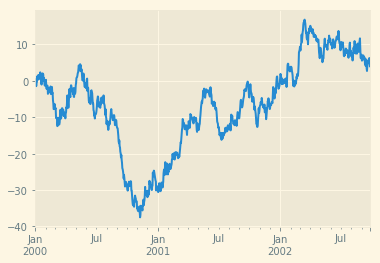

In [91]:
ts=pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2000',periods=1000))
ts=ts.cumsum()
ts.plot()
plt.savefig('pandas/pandas-10-min-intro/ts_plot.pdf') # save plot as pdf


<Figure size 432x288 with 0 Axes>

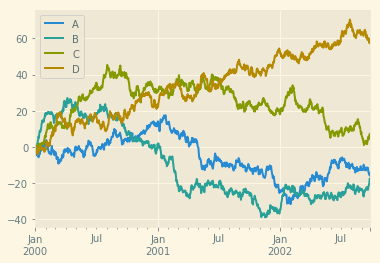

In [92]:
# on a DataFrame, the plot() method is a convenience to plot all of the columns with labels
df=pd.DataFrame(np.random.randn(1000,4),index=ts.index,
                    columns=['A','B','C','D'])
df=df.cumsum()
plt.figure()
df.plot()
# set legend in best location; change legend text colour to match that of the axes
plt.setp(plt.legend(loc='best').get_texts(),color='#586e75')
plt.savefig('pandas/pandas-10-min-intro/df_plot.pdf') # save plot as pdf


 ## Getting data in / out

 ### CSV

In [93]:
# writing to a csv file
df.to_csv('pandas/pandas-10-min-intro/foo.csv')
# reading from a csv file
pd.read_csv('pandas/pandas-10-min-intro/foo.csv')


,Unnamed: 0,A,B,C,D
0,2000-01-01,-2.197195,0.262142,0.551399,0.158559
1,2000-01-02,-3.271663,-0.362923,-0.436601,0.357392
2,2000-01-03,-2.553831,-0.170874,-1.855592,0.864882
3,2000-01-04,-3.846089,0.440739,-2.110532,-1.806337
4,2000-01-05,-4.436259,0.386953,-0.405266,-2.234685
5,2000-01-06,-4.411016,-0.273407,-0.716643,-3.163514
6,2000-01-07,-4.310271,1.792426,-0.988221,-2.567998
7,2000-01-08,-4.676561,2.271568,-0.421087,-4.161615
8,2000-01-09,-2.920955,3.520080,0.169224,-3.505155
9,2000-01-10,-4.307166,4.224183,-0.038879,-3.331446


 ### HDF5

In [94]:
# writing to a HDF5 Store
df.to_hdf('pandas/pandas-10-min-intro/foo.h5', 'df')
# reading from a HDF5 Store
pd.read_hdf('pandas/pandas-10-min-intro/foo.h5', 'df')


,A,B,C,D
2000-01-01,-2.197195,0.262142,0.551399,0.158559
2000-01-02,-3.271663,-0.362923,-0.436601,0.357392
2000-01-03,-2.553831,-0.170874,-1.855592,0.864882
2000-01-04,-3.846089,0.440739,-2.110532,-1.806337
2000-01-05,-4.436259,0.386953,-0.405266,-2.234685
2000-01-06,-4.411016,-0.273407,-0.716643,-3.163514
2000-01-07,-4.310271,1.792426,-0.988221,-2.567998
2000-01-08,-4.676561,2.271568,-0.421087,-4.161615
2000-01-09,-2.920955,3.520080,0.169224,-3.505155
2000-01-10,-4.307166,4.224183,-0.038879,-3.331446


 ### Excel

In [95]:
# writing to an excel file
df.to_excel('pandas/pandas-10-min-intro/foo.xlsx',sheet_name='Sheet1')
# reading from an excel file
pd.read_excel('pandas/pandas-10-min-intro/foo.xlsx','Sheet1',index_col=None,na_values=['NA'])


,Unnamed: 0,A,B,C,D
0,2000-01-01,-2.197195,0.262142,0.551399,0.158559
1,2000-01-02,-3.271663,-0.362923,-0.436601,0.357392
2,2000-01-03,-2.553831,-0.170874,-1.855592,0.864882
3,2000-01-04,-3.846089,0.440739,-2.110532,-1.806337
4,2000-01-05,-4.436259,0.386953,-0.405266,-2.234685
5,2000-01-06,-4.411016,-0.273407,-0.716643,-3.163514
6,2000-01-07,-4.310271,1.792426,-0.988221,-2.567998
7,2000-01-08,-4.676561,2.271568,-0.421087,-4.161615
8,2000-01-09,-2.920955,3.520080,0.169224,-3.505155
9,2000-01-10,-4.307166,4.224183,-0.038879,-3.331446


 ## Gotchas
 If you are attempting to perform an operation you might see an exception like:
 ```python
 >>> if pd.Series([False, True, False]):
 ...     print("I was true")
 Traceback
    ...
 ValueError: The truth value of an array is ambiguous. Use a.empty, a.any() or a.all().
 ```